In this study, we use percolation theory as an analogy to explore the behavior of microtubule-kinesin active matter systems. The goal is to understand how the properties of the system, specifically the length of the microtubules, affect the formation of giant components, which could provide insights into the overall connectivity and functionality of the system. The mean of the log-normal distribution represents the average size of the microtubules, while the standard deviation corresponds to the variability in microtubule lengths, with larger values indicating a wider range of microtubule sizes, including longer ones. By using a random graph model and varying the edge probabilities according to a log-normal distribution, we simulate the various conditions that can arise in the microtubule-kinesin system, where a higher edge probability corresponds to a longer microtubule with a greater chance of forming a giant component.

To investigate this problem, the following steps are performed in the code:

1. Define functions to generate edge probabilities using a log-normal distribution, create random graphs based on the provided mean and standard deviation, and calculate the giant component ratio in the graph. The giant component ratio is the ratio of the largest connected component's size to the total number of nodes in the graph.

2. Set up the parameters for the graph, such as the number of nodes (n) and the connection probability (p). Specify a range of mean and standard deviation values for the log-normal distribution to explore the impact of these parameters on the formation of giant components.

3. Calculate the average giant component ratio for each combination of mean and standard deviation values by generating graphs, analyzing the graphs to find the giant component ratio, and taking the average over multiple trials. This step provides a comprehensive view of how the giant component ratio changes under different conditions.

4. Create a phase diagram to visualize the relationship between the mean and standard deviation of the log-normal distribution and the average giant component ratio. This plot helps to identify trends and critical points where the formation of giant components becomes more likely.

5. Generate graphs with a fixed mean value and varying standard deviation values. Calculate the giant component ratios and their standard deviations for each graph, and plot a few representative graphs to visualize the effect of changing the standard deviation. This step allows for a more detailed examination of the system's behavior under specific conditions.

6. Create a line plot with shaded error regions to display the relationship between the standard deviation of the log-normal distribution and the giant component ratio. Draw a vertical line indicating the point at which the giant component ratio reaches 1.0, which helps to identify the critical standard deviation value at which the graph becomes highly connected.

By following these steps, the code provides a detailed analysis of the microtubule-kinesin active matter system using a percolation theory-based analogy. The phase diagram and line plot reveal the conditions that favor the emergence of giant components, highlighting the role of microtubule length and the variability in microtubule sizes in determining the overall connectivity and functionality of the system. This analysis can help researchers better understand the behavior of such systems, enabling them to make more informed decisions when designing experiments or engineering applications that rely on the interconnectedness of microtubule-kinesin active matter systems.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import random
from numba import jit, prange
import cProfile
from multiprocessing import Pool




#### Define functions to generate edge probabilities using a log-normal distribution, create random graphs based on the provided mean and standard deviation, and calculate the giant component ratio in the graph. The giant component ratio is the ratio of the largest connected component's size to the total number of nodes in the graph.

In [36]:
# Define a function to generate edge probabilities using a log-normal distribution
# def edge_probability_distribution(mean, std_dev):
#     return np.random.lognormal(mean, std_dev)

def edge_probability_distribution(shape, scale):
    return np.random.gamma(shape, scale)



# Define a function to generate a random graph with n nodes, based on the provided mean, standard deviation, and connection probability p
def generate_graph(n, shape, scale, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(n):
        for j in range(i+1, n):
            edge_prob = edge_probability_distribution(shape, scale)
            if edge_prob > p:  # Change this line
                G.add_edge(i, j)
    return G

# Define a function to analyze the graph and calculate the giant component ratio

def analyze_graph(G):
    giant_component_ratio = 0
    
    for component in nx.connected_components(G):
        if len(component) > giant_component_ratio:
            giant_component_ratio = len(component)

    return giant_component_ratio / G.number_of_nodes()





In [37]:
def generate_microtubule_lengths(shape, scale, total_length):
    # Initialize the lengths list and the current total length
    lengths = []
    current_total_length = 0

    # Keep generating lengths until the current total length is less than the desired total length
    while current_total_length < total_length:
        # Generate a new length
        new_length = np.random.gamma(shape, scale)
        
        # If adding the new length doesn't exceed the total length, add it to the lengths
        if current_total_length + new_length <= total_length:
            lengths.append(new_length)
            current_total_length += new_length
        else:
            # If adding the new length would exceed the total length, add a length that will make the current total length equal to the total length
            lengths.append(total_length - current_total_length)
            break

    return np.array(lengths)


In [38]:
shape = 2
scale = 1
total_length = 1000

lengths = generate_microtubule_lengths(shape, scale, total_length)

print(lengths)
print(np.sum(lengths))  # This should be equal to total_length


[1.67388019 2.74734135 1.51464976 1.00811485 0.76032578 1.93652341
 1.62300861 3.17557422 0.54615169 3.64470264 0.79677678 0.20793617
 2.96040512 0.45605558 0.93253377 2.60956958 4.85755188 0.86550891
 1.31318189 0.45763048 6.27424672 1.16795614 3.17263684 0.91218878
 1.71406028 6.62467961 2.48309772 1.00986212 1.66068407 1.10522545
 1.42442297 3.77857484 2.8960129  1.11150898 2.4813282  3.20596329
 0.85467374 1.13978971 0.4796801  0.36478171 0.28605883 1.04668099
 0.37058195 1.58174683 1.65375886 1.04656897 2.08005398 3.0383241
 1.48298822 6.14134607 0.99688965 0.49224752 1.58472714 0.64401277
 2.04368135 4.19407696 4.85827837 1.89413337 5.40572678 2.19695049
 1.46780605 3.7518565  1.56392062 2.92854759 1.82594271 4.06041641
 0.32095198 0.85303755 1.02347554 1.84676042 1.72398763 0.91107175
 0.8121955  1.36866425 0.72083059 1.05640148 7.89114726 0.07819335
 1.5388961  1.10939053 0.75575667 1.5257028  0.54586155 2.85310747
 0.72829658 0.24798797 2.31373111 0.39034346 2.3228389  0.23361

#### Calculate the average giant component ratio for each combination of mean and standard deviation values by generating graphs, analyzing the graphs to find the giant component ratio, and taking the average over multiple trials. This step provides a comprehensive view of how the giant component ratio changes under different conditions.

In [40]:
# Parameters
n = 100
p = 9
shape_values = np.linspace(0.1, 7, 50)
scale_values = np.linspace(0.1, 7, 50)

# Calculate the average giant component ratio for each combination of mean and standard deviation values

heatmap_data = np.zeros((len(shape_values), len(scale_values)))

for i, mean in enumerate(shape_values):
    for j, std_dev in enumerate(scale_values):
        ratios = []
        for _ in range(5):
            G = generate_graph(n, mean, std_dev, p)
            giant_component_ratio = analyze_graph(G)
            ratios.append(giant_component_ratio)
        
        avg_ratio = np.mean(ratios)
        heatmap_data[i, j] = avg_ratio

#### Create a phase diagram to visualize the relationship between the mean and standard deviation of the log-normal distribution and the average giant component ratio. This plot helps to identify trends and critical points where the formation of giant components becomes more likely.

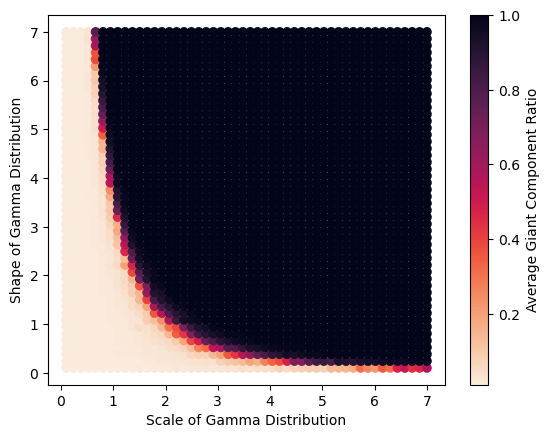

In [41]:
# Phase diagram
scale_grid, shape_grid = np.meshgrid(scale_values, shape_values)
plt.figure()
plt.scatter(scale_grid, shape_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Shape of Gamma Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

#### Generate graphs with a fixed mean value and varying standard deviation values. Calculate the giant component ratios and their standard deviations for each graph, and plot a few representative graphs to visualize the effect of changing the standard deviation. This step allows for a more detailed examination of the system's behavior under specific conditions.

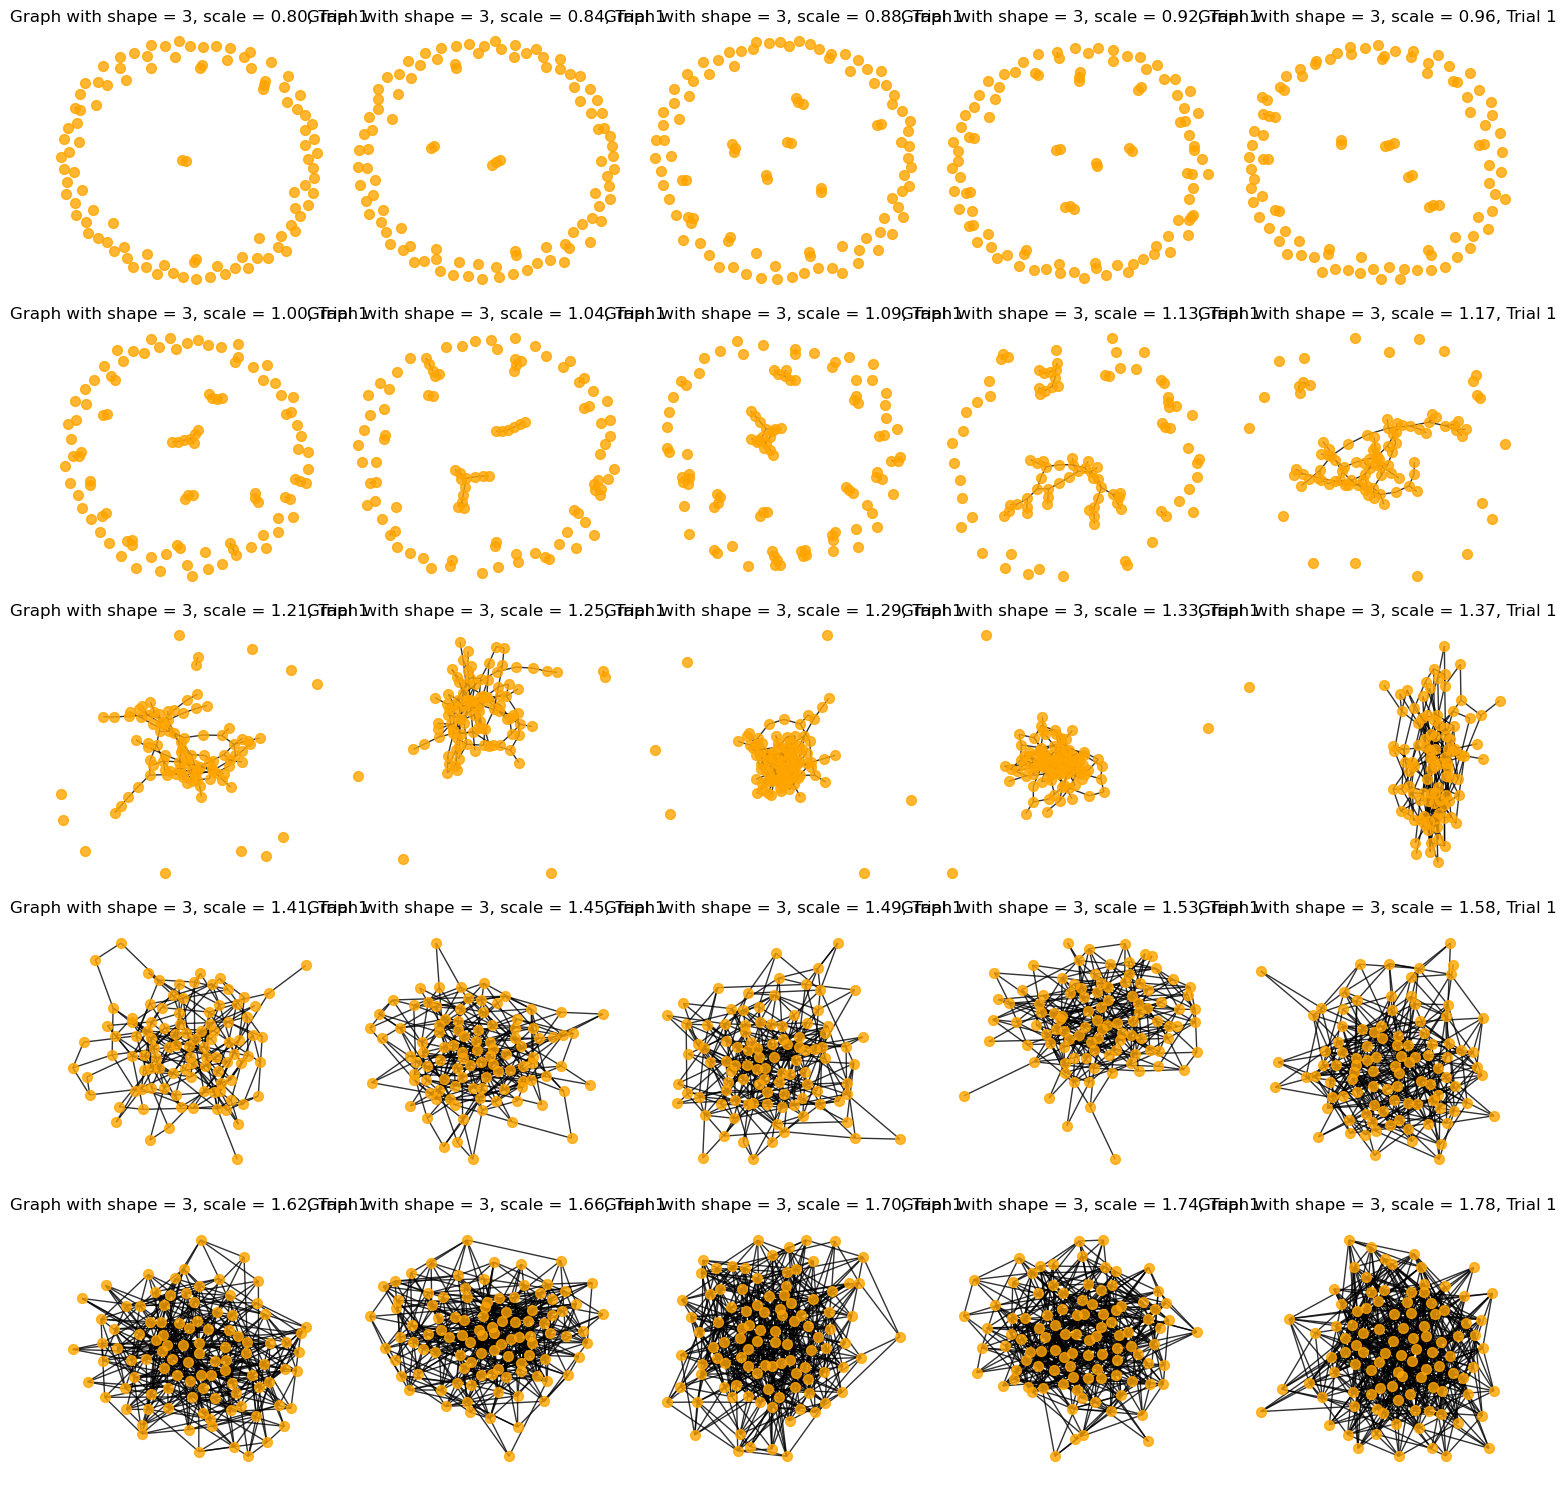

In [42]:
# Generate the average giant component ratios

shape = 3  # fixed shape for gamma
scale_values = np.linspace(0.8, 1.8, 50)  # for scale in gamma

n_plots = len(scale_values) // 2  # Use integer division here
ncols = 5
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

avg_ratios = []
std_devs = []

for j, scale in enumerate(scale_values):
    ratios = []
    for i in range(100):
        G = generate_graph(n, shape, scale, p)
        giant_component_ratio = analyze_graph(G)
        ratios.append(giant_component_ratio)
        if i == 0 and j % 2 == 0:  
            row, col = (j // 2) // ncols, (j // 2) % ncols
            ax = axes[row, col]
            pos = nx.spring_layout(G)
            nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8, ax=ax)
            ax.set_title(f'Graph with shape = {shape}, scale = {scale:.2f}, Trial {i+1}')
            ax.axis('off')
    avg_ratio = np.mean(ratios)
    std_dev_ratio = np.std(ratios)
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev_ratio)

avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Adjust layout
plt.tight_layout()
plt.show()


#### Create a line plot with shaded error regions to display the relationship between the standard deviation of the log-normal distribution and the giant component ratio. Draw a vertical line indicating the point at which the giant component ratio reaches 1.0, which helps to identify the critical standard deviation value at which the graph becomes highly connected.

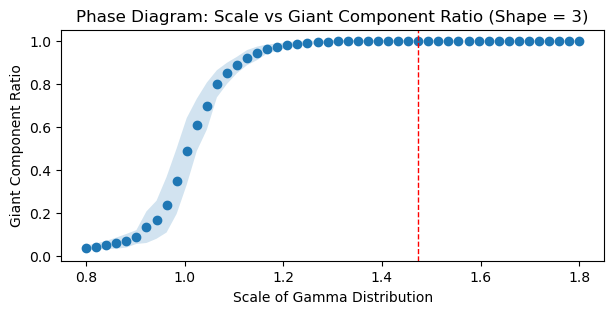

In [166]:
# Assuming you've stored the standard deviations of the giant component ratios in an array named `giant_comp_stddevs`

# Find the index where the giant component ratio reaches 1.0
index_1 = np.argmax(avg_ratios >= 1.0)

# Get the corresponding scale value
scale_1 = scale_values[index_1]

# Create a line plot with shaded error regions
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(scale_values, avg_ratios, 'o')
ax.fill_between(scale_values, avg_ratios - std_devs, avg_ratios + std_devs, alpha=0.2)

# Draw a vertical line when the giant component ratio reaches 1.0
ax.axvline(scale_1, color='red', linestyle='--',  linewidth=1)

ax.set_xlabel('Scale of Gamma Distribution')
ax.set_ylabel('Giant Component Ratio')
ax.set_title('Phase Diagram: Scale vs Giant Component Ratio (Shape = 3)')
plt.show()


# Clamping 

In [18]:
import generate_microtubule_lengths

In [8]:
@jit(nopython=True)
def generate_microtubule_lengths(shape, scale, total_length):
    lengths = []
    current_total_length = 0.0
    while current_total_length < total_length:
        new_length = round(np.random.gamma(shape, scale), 1)
        if new_length >= 1 and new_length <= 25:
            if current_total_length + new_length <= total_length:
                lengths.append(new_length)
                current_total_length += new_length
            else:
                new_length = total_length - current_total_length
                if new_length >= 1:
                    lengths.append(new_length)
                    break
                else:
                    break
    return np.array(lengths)


def generate_graph(shape, scale, total_length):
    edge_lengths = generate_microtubule_lengths(shape, scale, total_length)
    n = len(edge_lengths)

    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i, edge_length in enumerate(edge_lengths):
        if edge_length > 9:  # If the edge length is greater than 9, add an edge
            G.add_edge(i, (i+1) % n)  # Use modulus to loop back to the start

    return G



def analyze_graph(G):
    giant_component_ratio = 0
    for component in nx.connected_components(G):
        if len(component) > giant_component_ratio:
            giant_component_ratio = len(component)
    return giant_component_ratio / G.number_of_nodes()

In [9]:
# def generate_microtubule_lengths(shape, scale, total_length):
#     lengths = []
#     current_total_length = 0
#     while current_total_length < total_length:
#         new_length = round(np.random.gamma(shape, scale), 1)
#         if new_length >= 1 and new_length <= 25:
#             if current_total_length + new_length <= total_length:
#                 lengths.append(new_length)
#                 current_total_length += new_length
#             else:
#                 new_length = total_length - current_total_length
#                 if new_length >= 1:
#                     lengths.append(new_length)
#                     break
#                 else:
#                     break
#     return np.array(lengths)


def parallel_generate_microtubule_lengths(n_processes, shape, scale, total_length):
    # Break total_length into n_processes parts
    total_length_parts = [total_length / n_processes] * n_processes

    with Pool(n_processes) as p:
        result = p.starmap(my_script.generate_microtubule_lengths, [(shape, scale, length) for length in total_length_parts])

    # Combine the results from all processes
    final_lengths = np.concatenate(result)

    return final_lengths

def generate_graph(shape, scale, total_length):
    lengths = generate_microtubule_lengths(shape, scale, total_length)

    # The number of nodes should be equal to the number of edges + 1
    n = len(lengths) + 1

    G = nx.Graph()
    G.add_nodes_from(range(n))

    for i in range(len(lengths)):
        # Connect each edge to two nodes
        G.add_edge(i, i+1, weight=lengths[i])

    return G


def analyze_graph(G):
    giant_component_ratio = 0
    for component in nx.connected_components(G):
        if len(component) > giant_component_ratio:
            giant_component_ratio = len(component)
    return giant_component_ratio / G.number_of_nodes()


In [10]:
# Parameters
total_length = 1000  # total length of the microtubules
shape_values = np.linspace(0.1, 7, 50)
scale_values = np.linspace(0.1, 7, 50)

# Calculate the average giant component ratio for each combination of shape and scale values
heatmap_data = np.zeros((len(shape_values), len(scale_values)))

for i, shape in enumerate(shape_values):
    for j, scale in enumerate(scale_values):
        ratios = []
        for _ in range(100):
            G = generate_graph(shape, scale, total_length)
            giant_component_ratio = analyze_graph(G)
            ratios.append(giant_component_ratio)
        
        avg_ratio = np.mean(ratios)
        heatmap_data[i, j] = avg_ratio


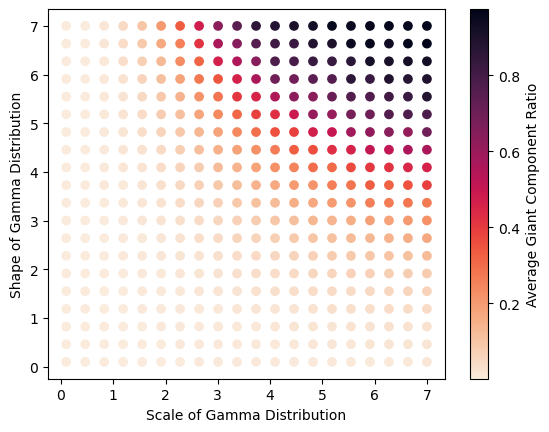

In [27]:
# Phase diagram
scale_grid, shape_grid = np.meshgrid(scale_values, shape_values)
plt.figure()
plt.scatter(scale_grid, shape_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Shape of Gamma Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

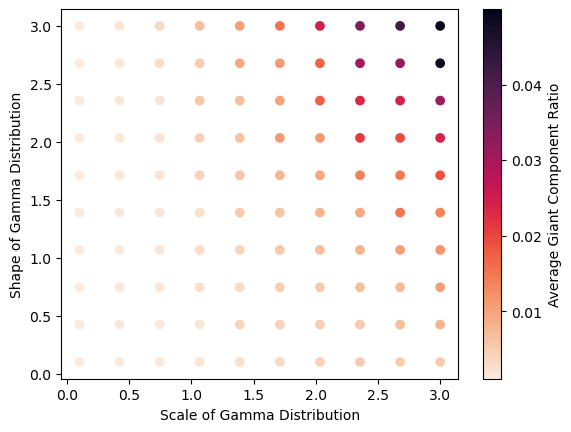

In [19]:
# Phase diagram
scale_grid, shape_grid = np.meshgrid(scale_values, shape_values)
plt.figure()
plt.scatter(scale_grid, shape_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Shape of Gamma Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

In [20]:
def compute_ratio(params):
    shape, scale = params
    ratios = []
    for _ in range(100):
        G = generate_graph(shape, scale, total_length)
        giant_component_ratio = analyze_graph(G)
        ratios.append(giant_component_ratio)
    return np.mean(ratios)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import random
from numba import jit, prange
import cProfile
from multiprocessing import Pool




from percolation_functions import compute_ratio

In [43]:
# Parameters
total_length = 1000  # total length of the microtubules
shape_values = np.linspace(0.1, 7, 50)
scale_values = np.linspace(0.1, 7, 50)
heatmap_data = np.load('heatmap_data_ppf.npy')


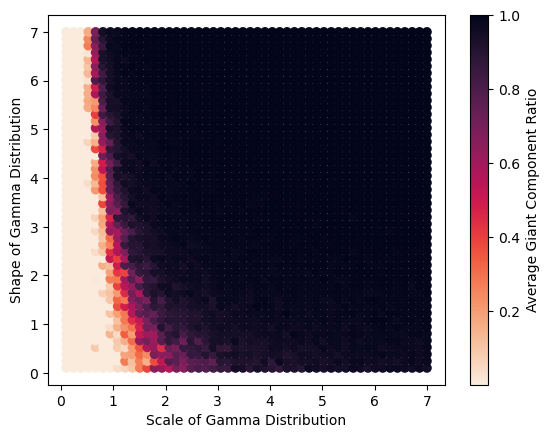

In [44]:
# Phase diagram
scale_grid, shape_grid = np.meshgrid(scale_values, shape_values)
plt.figure()
plt.scatter(scale_grid, shape_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Shape of Gamma Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

In [77]:
import pickle

# Load the data
with open('network_plot_data.pkl', 'rb') as f:
    plot_data = pickle.load(f)

# Separate the data into different arrays
shape_values, scale_values, avg_ratios, std_devs, graph_data = zip(*plot_data)

# Convert to numpy arrays for easier manipulation
shape_values = np.array(shape_values)
scale_values = np.array(scale_values)
avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)


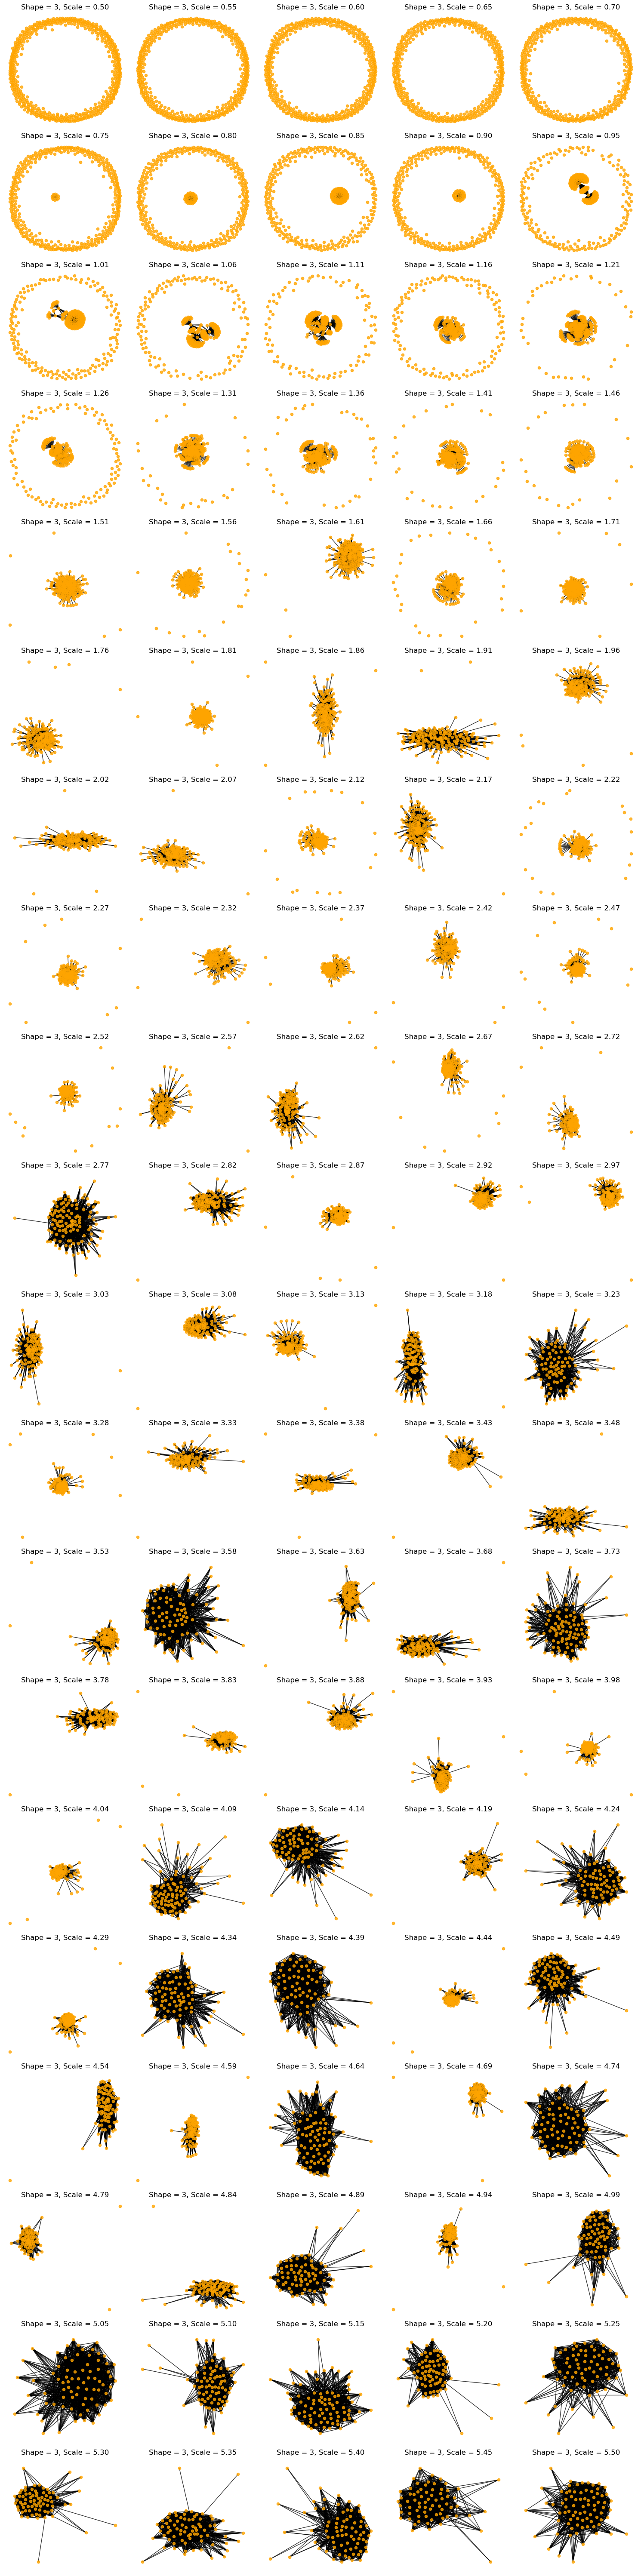

In [78]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import numpy as np

# Load the data
with open('network_plot_data.pkl', 'rb') as f:
    plot_data = pickle.load(f)

# Separate the data into different arrays
shape_values, scale_values, avg_ratios, std_devs, graph_data = zip(*plot_data)

# Convert to numpy arrays for easier manipulation
shape_values = np.array(shape_values)
scale_values = np.array(scale_values)
avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Determine the number of plots
n_graphs = len(scale_values)
ncols = 5
nrows = int(np.ceil(n_graphs / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

# Flatten the axes array in case it's 2D
axes = axes.flatten()

for i in range(n_graphs):
    ax = axes[i]
    G, _ = graph_data[i][0]  # The first trial's graph data
    
    # Calculate the number of nodes in the graph
    n = G.number_of_nodes()

    # Calculate the k factor based on the number of nodes
    k = 2/np.sqrt(n)
    
    # Generate the spring layout using the calculated k factor
    pos = nx.spring_layout(G, k=k)
    
    nx.draw_networkx(G, pos, node_color='orange', node_size=20, with_labels=False, alpha=0.8, ax=ax)
    ax.set_title(f'Shape = {shape_values[i]}, Scale = {scale_values[i]:.2f}')
    ax.axis('off')

# Hide remaining axes if they exist
for j in range(n_graphs, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


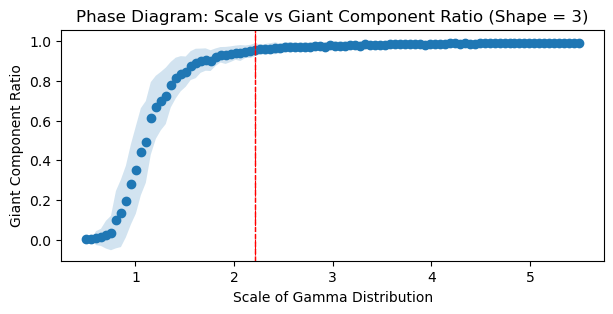

In [79]:
# Find the index where the giant component ratio reaches 1.0
index_1 = np.argmax(avg_ratios >= 0.95)

# Get the corresponding scale value
scale_1 = scale_values[index_1]

# Create a line plot with shaded error regions
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(scale_values, avg_ratios, 'o')
ax.fill_between(scale_values, avg_ratios - std_devs, avg_ratios + std_devs, alpha=0.2)

# Draw a vertical line when the giant component ratio reaches 1.0
ax.axvline(scale_1, color='red', linestyle='--', linewidth=0.8)
ax.axvline(scale_1, color='red', linestyle='--',  linewidth=1)

ax.set_xlabel('Scale of Gamma Distribution')
ax.set_ylabel('Giant Component Ratio')
ax.set_title('Phase Diagram: Scale vs Giant Component Ratio (Shape = 3)')
plt.show()


In [80]:
avg_ratios


array([0.00189871, 0.00202308, 0.00705002, 0.01096887, 0.02461799,
       0.03275238, 0.10034894, 0.13247992, 0.19210657, 0.27825821,
       0.35142698, 0.4431983 , 0.492681  , 0.61171628, 0.66695786,
       0.69843904, 0.72510304, 0.78131154, 0.81496861, 0.83672449,
       0.84729711, 0.87773948, 0.88852341, 0.90251946, 0.90830674,
       0.90273496, 0.92032229, 0.93231943, 0.9290548 , 0.93521173,
       0.94286981, 0.94138046, 0.9479043 , 0.94956025, 0.95834055,
       0.96013603, 0.95946524, 0.96362977, 0.96508921, 0.96419895,
       0.97118875, 0.97069661, 0.97200922, 0.97083822, 0.97173666,
       0.9732991 , 0.97852116, 0.97614263, 0.97229642, 0.97938212,
       0.9784643 , 0.97903716, 0.9778158 , 0.97981871, 0.98137142,
       0.97450596, 0.98514223, 0.97923576, 0.98140395, 0.98158659,
       0.98393041, 0.98664204, 0.98712111, 0.98570838, 0.98696608,
       0.98481567, 0.98657766, 0.98695848, 0.98408576, 0.98747027,
       0.98655904, 0.98747223, 0.98852223, 0.98958607, 0.98959

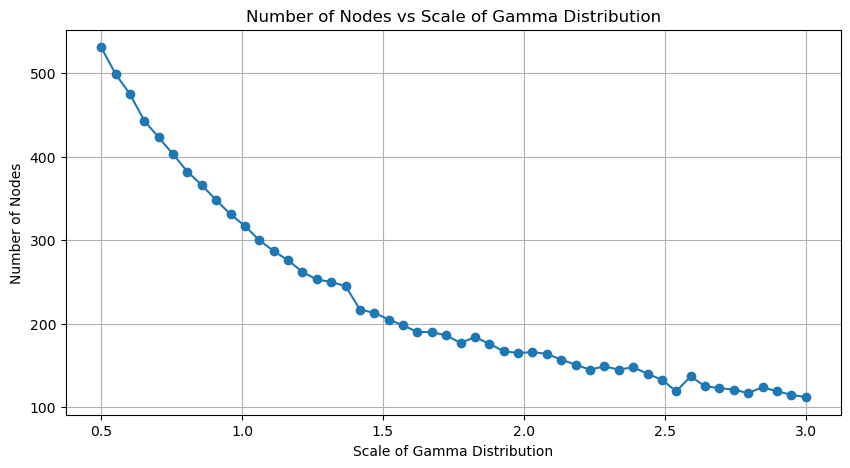

In [54]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load the data
with open('network_plot_data.pkl', 'rb') as f:
    plot_data = pickle.load(f)

# Separate the data into different arrays
shape_values, scale_values, avg_ratios, std_devs, graph_data = zip(*plot_data)

# Convert to numpy arrays for easier manipulation
shape_values = np.array(shape_values)
scale_values = np.array(scale_values)

# Extract number of nodes for each graph
# Extract number of nodes for each graph
node_counts = [graph[0][0].number_of_nodes() for graph in graph_data]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(scale_values, node_counts, marker='o')
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes vs Scale of Gamma Distribution')
plt.grid(True)
plt.show()


In [ ]:
def generate_heatmap_data(shape_values, scale_values):
    params = [(shape, scale) for shape in shape_values for scale in scale_values]

    with Pool(10) as p:
        results = p.map(compute_ratio, params)

    return np.array(results).reshape(len(shape_values), len(scale_values))

if __name__ == '__main__':
    shape_values = np.linspace(0.1, 7, 20)
    scale_values = np.linspace(0.1, 7, 20)

    heatmap_data = generate_heatmap_data(shape_values, scale_values)
    np.save('heatmap_data.npy', heatmap_data)

In [ ]:
total_length = 1000  # total length of the microtubules
shape_values = np.linspace(0.1, 7, 5)
scale_values = np.linspace(0.1, 7, 5)

# Create a list of parameter pairs and convert them into a NumPy array
params = np.array([(shape, scale) for shape in shape_values for scale in scale_values])

# Use compute_all_ratios function to compute all ratios in parallel
results = compute_all_ratios(params)

heatmap_data = np.array(results).reshape(len(shape_values), len(scale_values))


In [2]:
total_length = 1000  # total length of the microtubules
shape_values = np.linspace(0.1, 7, 3)
scale_values = np.linspace(0.1, 7, 3)

# Create a list of parameter pairs
params = [(shape, scale) for shape in shape_values for scale in scale_values]

# Create a pool of worker processes
with Pool(10) as p:  # use 10 processes
    # Apply compute_ratio to each pair of shape and scale values
    results = p.map(compute_ratio, params)

heatmap_data = np.array(results).reshape(len(shape_values), len(scale_values))

KeyboardInterrupt: 

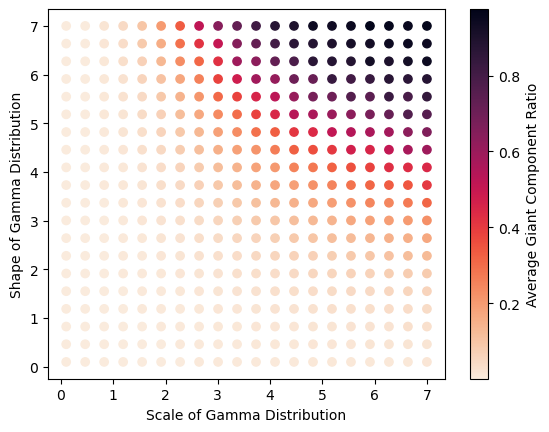

In [ ]:
# Phase diagram
scale_grid, shape_grid = np.meshgrid(scale_values, shape_values)
plt.figure()
plt.scatter(scale_grid, shape_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Scale of Gamma Distribution')
plt.ylabel('Shape of Gamma Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

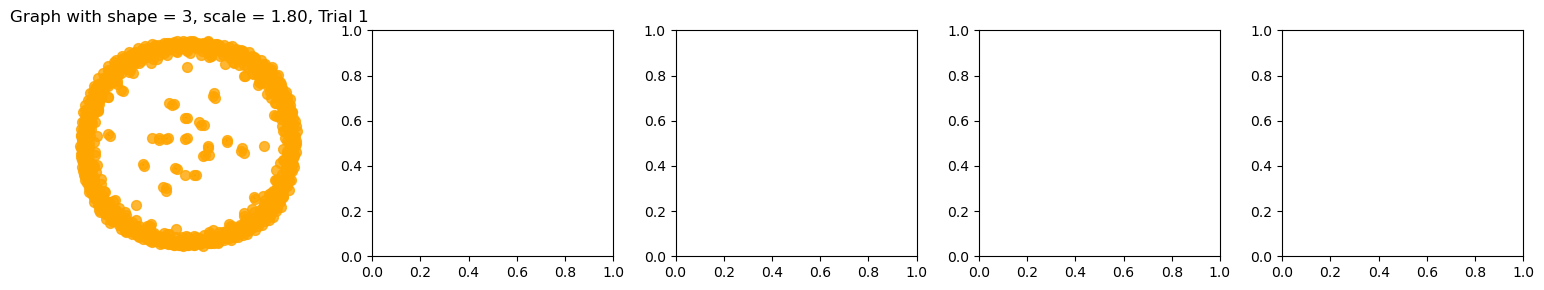

In [16]:
# Generate the average giant component ratios
shape = 3  # fixed shape for gamma
scale_values = np.linspace(0.8, 1.8, 5)  # for scale in gamma

n_plots = len(scale_values) // 2  # Use integer division here
ncols = 5
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

avg_ratios = []
std_devs = []

for j, scale in enumerate(scale_values):
    ratios = []
    for i in range(5):
        G = generate_graph(shape, scale, 1000)  # total_length is set to 1000
        giant_component_ratio = analyze_graph(G)
        ratios.append(giant_component_ratio)
        if i == 0 and j % 2 == 0:  
            row, col = (j // 2) // ncols, (j // 2) % ncols
            ax = axes[row] if axes.ndim == 1 else axes[row, col]
            pos = nx.spring_layout(G)
            nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8, ax=ax)
            ax.set_title(f'Graph with shape = {shape}, scale = {scale:.2f}, Trial {i+1}')
            ax.axis('off')
    avg_ratio = np.mean(ratios)
    std_dev_ratio = np.std(ratios)
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev_ratio)

avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Adjust layout
plt.tight_layout()
plt.show()

### Multiprocessing

In [31]:
from percolation_functions import generate_graph_parallel


In [37]:
# Define the run_simulation_parallel function
def run_simulation_parallel(n_processes):
    # Parameters
    total_length = 1000  # total length of the microtubules
    shape_values = np.linspace(0.1, 7, 3)
    scale_values = np.linspace(0.1, 7, 3)

    # Calculate the average giant component ratio for each combination of shape and scale values
    heatmap_data = np.zeros((len(shape_values), len(scale_values)))

    # Create a list to store all the tasks
    tasks = []

    for i, shape in enumerate(shape_values):
        for j, scale in enumerate(scale_values):
            for _ in range(5):
                # Each task is a tuple with the necessary arguments for generate_graph function
                task = (shape, scale, total_length)
                tasks.append(task)

    # Create a pool of workers
    with Pool(n_processes) as p:
        # Use map function to distribute the tasks among the workers
        results = p.map(generate_graph_parallel, tasks)

    # Process the results
    for i, shape in enumerate(shape_values):
        for j, scale in enumerate(scale_values):
            avg_ratio = np.mean([result for result, task_shape, task_scale in results if task_shape == shape and task_scale == scale])
            heatmap_data[i, j] = avg_ratio

    return heatmap_data, shape_values, scale_values

# Define the plot_heatmap function
def plot_heatmap(heatmap_data, shape_values, scale_values):
    plt.imshow(heatmap_data, cmap='hot', interpolation='nearest', origin='lower')
    plt.colorbar(label='Average Giant Component Ratio')
    plt.xticks(np.arange(len(scale_values)), np.round(scale_values, 2), rotation=45)
    plt.yticks(np.arange(len(shape_values)), np.round(shape_values, 2))
    plt.xlabel('Scale Values')
    plt.ylabel('Shape Values')
    plt.title('Heatmap of Average Giant Component Ratio')
    plt.show()




/opt/anaconda3/envs/active_matters/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/active_matters/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


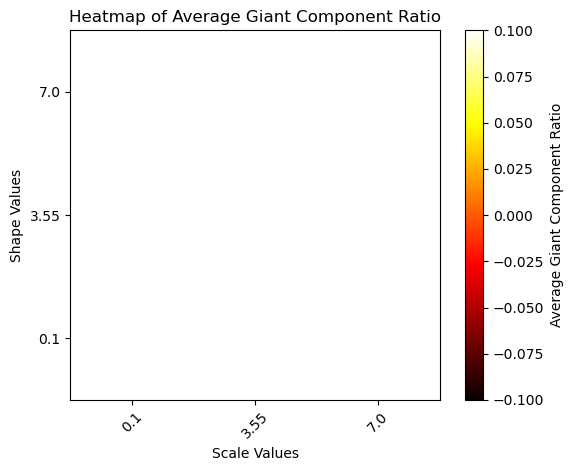

In [38]:
# Run the simulation
n_processes = 4  # adjust as needed
heatmap_data, shape_values, scale_values = run_simulation_parallel(n_processes)

# Plot the heatmap
plot_heatmap(heatmap_data, shape_values, scale_values)

Number of nodes: 115


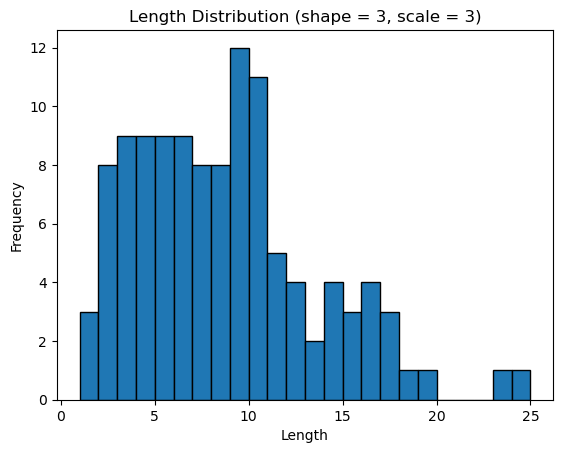

In [16]:
# Parameters
shape = 3
scale = 3
total_length = 1000

# Generate lengths
lengths = generate_microtubule_lengths(shape, scale, total_length)

# Print the number of nodes
print("Number of nodes:", len(lengths))

# Plot the histogram of lengths
plt.hist(lengths, bins=range(1, 26), edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Length Distribution (shape = {shape}, scale = {scale})')
plt.show()


In [24]:
def run_simulation_parallel(n_processes):

    # Parameters
    total_length = 1000  # total length of the microtubules
    shape_values = np.linspace(0.1, 7, 3)
    scale_values = np.linspace(0.1, 7, 3)

    # Calculate the average giant component ratio for each combination of shape and scale values
    heatmap_data = np.zeros((len(shape_values), len(scale_values)))

    # Create a list to store all the tasks
    tasks = []

    for i, shape in enumerate(shape_values):
        for j, scale in enumerate(scale_values):
            for _ in range(5):
                # Each task is a tuple with the necessary arguments for generate_graph function
                task = (shape, scale, total_length)
                tasks.append(task)

    # Create a pool of workers
    with Pool(n_processes) as p:
        # Use map function to distribute the tasks among the workers
        results = p.map(generate_graph_parallel, tasks)

    # Process the results...


In [25]:
cProfile.run('run_simulation_parallel(8)')  # Replace 4 with your desired number of processes


         3539 function calls (3533 primitive calls) in 1.330 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.330    1.330 1194161781.py:1(run_simulation_parallel)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(linspace)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(ndim)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(result_type)
        8    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1033(_handle_fromlist)
       48    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:398(parent)
        1    0.000    0.000    1.330    1.330 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 _methods.py:54(_any)
       11    0.000    0.000    0.000    0.000 _weakrefset.py:8

TypeError: generate_graph_parallel() missing 3 required positional arguments: 'shape', 'scale', and 'total_length'

In [23]:

def run_simulation_parallel(n_processes):

    # Parameters
    total_length = 1000  # total length of the microtubules
    shape_values = np.linspace(0.1, 7, 3)
    scale_values = np.linspace(0.1, 7, 3)

    # Calculate the average giant component ratio for each combination of shape and scale values
    heatmap_data = np.zeros((len(shape_values), len(scale_values)))

    with Pool(n_processes) as p:
        for i, shape in enumerate(shape_values):
            for j, scale in enumerate(scale_values):
                ratios = []
                for _ in range(5):
                    result = p.apply_async(generate_graph_parallel, args=(n_processes, shape, scale, total_length))
                    G = result.get()
                    giant_component_ratio = analyze_graph(G)
                    ratios.append(giant_component_ratio)
                
                avg_ratio = np.mean(ratios)
                heatmap_data[i, j] = avg_ratio

    return heatmap_data

cProfile.run('run_simulation_parallel(8)')  # Replace 4 with your desired number of processes


         3451 function calls (3445 primitive calls) in 1.118 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.118    1.118 390750625.py:1(run_simulation_parallel)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(linspace)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(ndim)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(result_type)
        8    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1033(_handle_fromlist)
       48    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:398(parent)
        1    0.000    0.000    1.118    1.118 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 _methods.py:54(_any)
       11    0.001    0.000    0.001    0.000 _weakrefset.py:86

AssertionError: daemonic processes are not allowed to have children

In [17]:
def run_simulation():

    # Parameters
    total_length = 1000  # total length of the microtubules
    shape_values = np.linspace(0.1, 7, 3)
    scale_values = np.linspace(0.1, 7, 3)

    # Calculate the average giant component ratio for each combination of shape and scale values
    heatmap_data = np.zeros((len(shape_values), len(scale_values)))

    for i, shape in enumerate(shape_values):
        for j, scale in enumerate(scale_values):
            ratios = []
            for _ in range(5):
                G = generate_graph(shape, scale, total_length)
                giant_component_ratio = analyze_graph(G)
                ratios.append(giant_component_ratio)
            
            avg_ratio = np.mean(ratios)
            heatmap_data[i, j] = avg_ratio
cProfile.run('run_simulation()')


         505109 function calls (488755 primitive calls) in 413.156 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002  413.156  413.156 1519575750.py:1(run_simulation)
       45    0.005    0.000  413.131    9.181 3987134503.py:19(generate_graph)
       45    0.000    0.000    0.023    0.001 3987134503.py:35(analyze_graph)
       45  412.930    9.176  412.930    9.176 923705485.py:1(generate_microtubule_lengths)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(any)
      780    0.000    0.000    0.001    0.000 <__array_function__ internals>:177(can_cast)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(linspace)
        9    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(mean)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(ndim)
        2    0.000    0.000    0.000    0.000 <__array

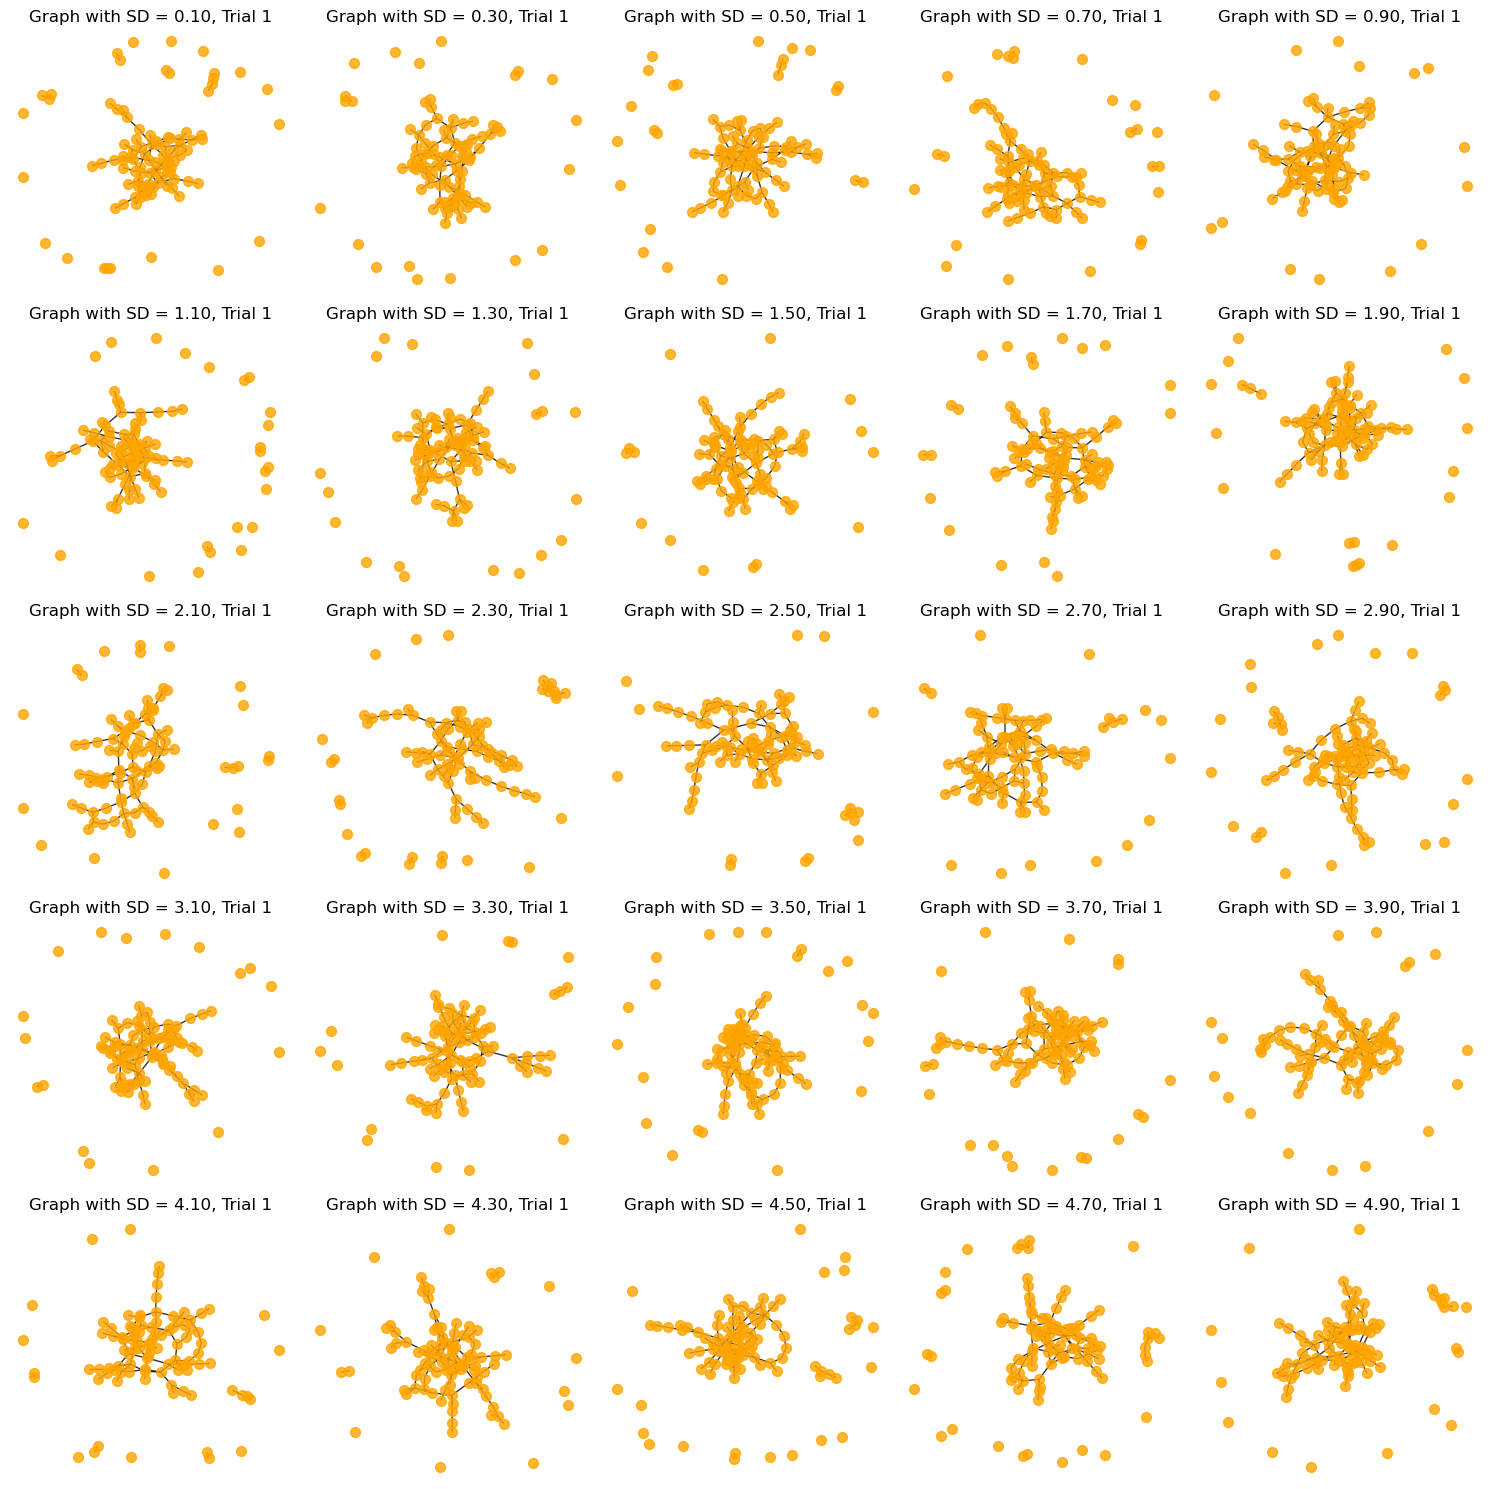

In [46]:
# Generate the average giant component ratios and their standard deviations

n_plots = len(std_dev_values) // 2  # Use integer division here
ncols = 5
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))

mean = -10
avg_ratios = []
std_devs = []

for j, std_dev in enumerate(std_dev_values):
    ratios = []
    for i in range(5):
        G = generate_graph(n, mean, std_dev, p)
        giant_component_ratio = analyze_graph(G)
        ratios.append(giant_component_ratio)
        if i == 0 and j % 2 == 0:  
            row, col = (j // 2) // ncols, (j // 2) % ncols
            ax = axes[row, col]
            pos = nx.spring_layout(G)
            nx.draw_networkx(G, pos, node_color='orange', node_size=50, with_labels=False, alpha=0.8, ax=ax)
            ax.set_title(f'Graph with SD = {std_dev:.2f}, Trial {i+1}')
            ax.axis('off')
    avg_ratio = np.mean(ratios)
    std_dev_ratio = np.std(ratios)
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev_ratio)

avg_ratios = np.array(avg_ratios)
std_devs = np.array(std_devs)

# Adjust layout
plt.tight_layout()
plt.show()


In [47]:
# Parameters
n = 100
p = 0.5
mean_values = np.linspace(-10, -3, 50)
std_dev_values = np.linspace(0.1, 5, 50)

# Calculate the average giant component ratio for each combination of mean and standard deviation values

heatmap_data = np.zeros((len(mean_values), len(std_dev_values)))

for i, mean in enumerate(mean_values):
    for j, std_dev in enumerate(std_dev_values):
        ratios = []
        for _ in range(10):
            G = generate_graph(n, mean, std_dev, p)
            giant_component_ratio = analyze_graph(G)
            ratios.append(giant_component_ratio)
        
        avg_ratio = np.mean(ratios)
        heatmap_data[i, j] = avg_ratio

KeyboardInterrupt: 

In [ ]:
# Phase diagram
std_dev_grid, mean_grid = np.meshgrid(std_dev_values, mean_values)
plt.figure()
plt.scatter(std_dev_grid, mean_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Standard Deviation of Log-Normal Distribution')
plt.ylabel('Mean of Log-Normal Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

In [34]:
# Parameters
n = 50
p = 0.5
mean_values = np.linspace(-10, 10, 50)
std_dev_values = np.linspace(0.1, 5, 50)
clamp_value = 10  # Set your desired clamp value here
time_steps = 10
decrease_rate = 0.01

# Calculate the average giant component ratio for each combination of mean and standard deviation values
heatmap_data = np.zeros((len(mean_values), len(std_dev_values)))

for i, mean in enumerate(mean_values):
    for j, std_dev in enumerate(std_dev_values):
        ratios = []
        for _ in range(10):
            G = generate_graph(n, mean, std_dev, p, time_steps, decrease_rate, clamp_value)
            giant_component_ratio = analyze_graph(G)
            ratios.append(giant_component_ratio)
        
        avg_ratio = np.mean(ratios)
        heatmap_data[i, j] = avg_ratio


KeyboardInterrupt: 

In [22]:
import cProfile

def main():
    # Parameters
    n = 50
    p = 0.5
    mean_values = np.linspace(-10, 10, 50)
    std_dev_values = np.linspace(0.1, 5, 50)

    # Calculate the average giant component ratio for each combination of mean and standard deviation values
    heatmap_data = np.zeros((len(mean_values), len(std_dev_values)))

    for i, mean in enumerate(mean_values):
        for j, std_dev in enumerate(std_dev_values):
            ratios = []
            for _ in range(10):
                G = generate_graph(n, mean, std_dev, p, time_steps=10, decrease_rate=0.01, clamp_value=200)
                giant_component_ratio = analyze_graph(G)
                ratios.append(giant_component_ratio)
            
            avg_ratio = np.mean(ratios)
            heatmap_data[i, j] = avg_ratio

cProfile.run('main()')


         1451438754 function calls (1451188748 primitive calls) in 425.617 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25000  129.423    0.005  421.809    0.017 1511175844.py:19(generate_graph)
147003966   34.478    0.000  159.631    0.000 1511175844.py:2(edge_probability_distribution)
    25000    0.066    0.000    2.387    0.000 1511175844.py:8(analyze_graph)
        1    1.274    1.274  425.617  425.617 1515904038.py:3(main)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(linspace)
     2500    0.006    0.000    0.143    0.000 <__array_function__ internals>:177(mean)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(ndim)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(result_type)
    25000    0.018    0.000    0.043    0.000 <class

In [29]:
heatmap_data

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

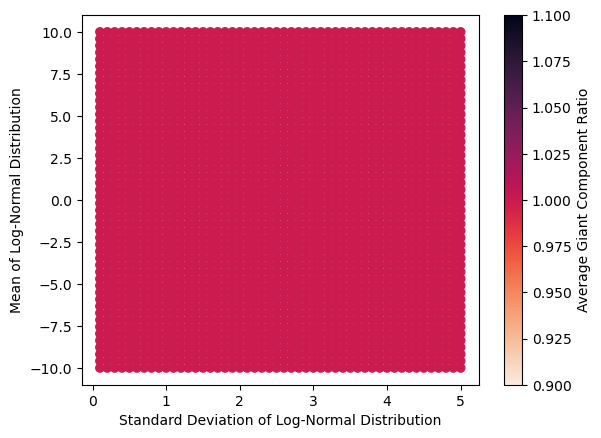

In [28]:
# Phase diagram
std_dev_grid, mean_grid = np.meshgrid(std_dev_values, mean_values)
plt.figure()
plt.scatter(std_dev_grid, mean_grid, c=heatmap_data.ravel(), cmap=sns.cm.rocket_r)
plt.xlabel('Standard Deviation of Log-Normal Distribution')
plt.ylabel('Mean of Log-Normal Distribution')
plt.colorbar(label='Average Giant Component Ratio')
plt.show()

/var/folders/p3/mdh493ks43l04slykq6gwbx80000gn/T/ipykernel_38937/2475430732.py:16: RuntimeWarning: invalid value encountered in log
  pdf = (np.exp(-(np.log(x) - mean)**2 / (2 * std_dev**2)) / (x * std_dev * np.sqrt(2 * np.pi)))


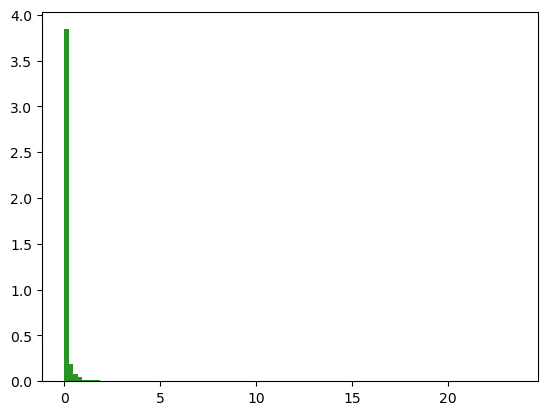

In [18]:
import numpy as np
import matplotlib.pyplot as plt

mean = -4
std_dev = 2
num_samples = 10000

samples = np.random.lognormal(mean, std_dev, num_samples)

# Create histogram
count, bins, ignored = plt.hist(samples, 100, density=True, alpha=0.6, color='g')

# Plot PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = (np.exp(-(np.log(x) - mean)**2 / (2 * std_dev**2)) / (x * std_dev * np.sqrt(2 * np.pi)))
plt.hist(samples, bins=100, density=True, alpha=0.6, color='g')
plt.show()


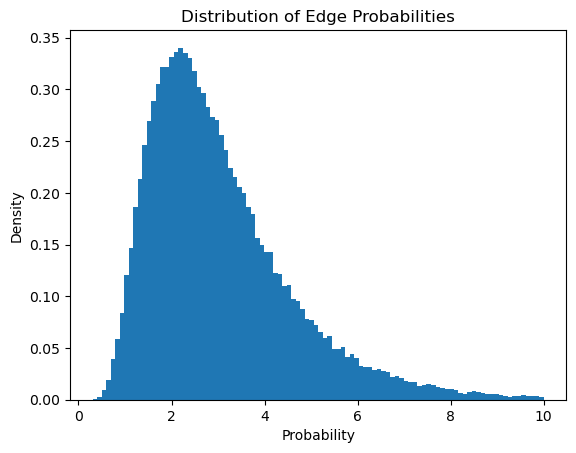

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define your function
def edge_probability_distribution(mean, std_dev, clamp_value):
    while True:
        prob = np.random.lognormal(mean, std_dev)
        if prob <= clamp_value:
            return prob


# Set the parameters for the log-normal distribution
mean = 1.0
std_dev = 0.5
clamp_value = 10

# Generate a large number of probabilities
probs = [edge_probability_distribution(mean, std_dev, clamp_value) for _ in range(100000)]

# Plot the histogram of the probabilities
plt.hist(probs, bins=100, density=True)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Distribution of Edge Probabilities')
plt.show()
